In [1]:
#Sarah Pagano 
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# storing data 
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")


train_df = pd.DataFrame(data = train_data)
test_df = pd.DataFrame(data = test_data)

In [2]:
#The features I decided to use were the features that were most relavent to wether or not a passenger survived. 
#data like "name" and "Ticket" are only really used as identifiers, and therefore show little relavence 
#when considering if a passenger survived 
train_df = train_df.drop(columns="Ticket")
train_df = train_df.drop(columns="PassengerId")
train_df = train_df.drop(columns="Name")
train_df = train_df.drop(columns="Cabin")

print(train_df)

test_df = test_df.drop(columns="Ticket")
test_df = test_df.drop(columns="PassengerId")
test_df = test_df.drop(columns="Name")
test_df = test_df.drop(columns="Cabin")

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


In [3]:
#encoding the categorical data 
le = LabelEncoder()

train_df["Sex_encode"] = le.fit_transform(train_df.loc[:,"Sex"])
train_df = train_df.drop(columns="Sex")

train_df["Embarked_encode"] = le.fit_transform(train_df.loc[:,"Embarked"].astype(str))
train_df = train_df.drop(columns="Embarked")

test_df["Sex_encode"] = le.fit_transform(test_df.loc[:,"Sex"])
test_df = test_df.drop(columns="Sex")

test_df["Embarked_encode"] = le.fit_transform(test_df.loc[:,"Embarked"].astype(str))
test_df = test_df.drop(columns="Embarked")

#filling in any missing values 
imputer = KNNImputer(n_neighbors=5)
train_df = pd.DataFrame(imputer.fit_transform(train_df),columns = train_df.columns)
test_df = pd.DataFrame(imputer.fit_transform(train_df),columns = train_df.columns)


print(train_df)

     Survived  Pclass   Age  SibSp  Parch     Fare  Sex_encode  \
0         0.0     3.0  22.0    1.0    0.0   7.2500         1.0   
1         1.0     1.0  38.0    1.0    0.0  71.2833         0.0   
2         1.0     3.0  26.0    0.0    0.0   7.9250         0.0   
3         1.0     1.0  35.0    1.0    0.0  53.1000         0.0   
4         0.0     3.0  35.0    0.0    0.0   8.0500         1.0   
..        ...     ...   ...    ...    ...      ...         ...   
886       0.0     2.0  27.0    0.0    0.0  13.0000         1.0   
887       1.0     1.0  19.0    0.0    0.0  30.0000         0.0   
888       0.0     3.0  26.8    1.0    2.0  23.4500         0.0   
889       1.0     1.0  26.0    0.0    0.0  30.0000         1.0   
890       0.0     3.0  32.0    0.0    0.0   7.7500         1.0   

     Embarked_encode  
0                2.0  
1                0.0  
2                2.0  
3                2.0  
4                2.0  
..               ...  
886              2.0  
887              2.0  


In [4]:
#splitting the training data
x = train_df.drop(columns="Survived")
y = train_df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)


0.7713004484304933

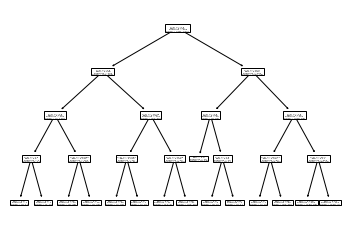

In [5]:
# decision tree model 
dt = tree.DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)

tree.plot_tree(dt)

y_predict = dt.predict(x_test)
accuracy_score(y_test, y_predict)

In [6]:
#random forest 
rf = RandomForestClassifier(max_depth=6) 
rf.fit(x_train, y_train)

y_predict = rf.predict(x_test)
accuracy_score(y_test, y_predict)

0.7757847533632287

In [7]:
#applying the 5 folds validation 

avgDT = 0
avgRF = 0

dtScores = cross_val_score(dt, x_train, y_train, cv=5)
print(dtScores)

rfScores = cross_val_score(rf, x_train, y_train, cv=5)
print(rfScores)

for i in range(5):
    avgDT += dtScores[i]
    avgRF += rfScores[i]
    
avgDT = avgDT / 5
avgRF = avgRF / 5

#printingt average 
print("AvgDT : ", avgDT)
print("AvgRF : ", avgRF)

[0.81343284 0.84328358 0.88059701 0.85714286 0.86466165]
[0.81343284 0.81343284 0.8880597  0.84962406 0.85714286]
AvgDT :  0.8518235888228034
AvgRF :  0.8443384580855122


In [8]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#linear
svmline = SVC(kernel = 'linear')
svmline.fit(x_train,y_train)

y_predline = svmline.predict(x_test)
print("linear: ")
print(accuracy_score(y_test, y_predline))

#quadratic
svmquad = SVC(kernel = 'poly')
svmquad.fit(x_train,y_train)

y_predquad = svmquad.predict(x_test)
print("quadratic: ")
print(accuracy_score(y_test, y_predquad))

#rbf
svmrbf = SVC(kernel = 'rbf')
svmrbf.fit(x_train,y_train)

y_predrbf = svmrbf.predict(x_test)
print("rbf: ")
print(accuracy_score(y_test, y_predrbf))

linear: 
0.7937219730941704
quadratic: 
0.5919282511210763
rbf: 
0.6367713004484304


In [9]:
#5 folds cross validation for linear 
lineScores = cross_val_score(svmline, x_train, y_train, cv=5)
print("linear: ")
print(lineScores)

#5 folds cross validation for quadratic
quadScores = cross_val_score(svmquad, x_train, y_train, cv=5)
print("quad: ")
print(quadScores)

#5 folds cross validation for rbf 
rbfScores = cross_val_score(svmrbf, x_train, y_train, cv=5)
print("rbf: ")
print(rbfScores)

linear: 
[0.70149254 0.79850746 0.85074627 0.81203008 0.79699248]
quad: 
[0.64179104 0.64179104 0.68656716 0.66917293 0.66917293]
rbf: 
[0.70149254 0.62686567 0.70895522 0.64661654 0.69924812]


In [10]:
#finding the average cross validation accuracy for each 

avgline = 0
avgquad = 0
avgrbf = 0

for i in range(5):
    avgline += lineScores[i]
    avgquad += quadScores[i]
    avgrbf += rbfScores[i]
    
avgline = avgline / 5
avgquad = avgquad / 5
avgrbf = avgrbf / 5

print("Avg linear : ", avgline)
print("Avg quadratric : ", avgquad)
print("Avg rbf : ", avgrbf)

Avg linear :  0.7919537650095387
Avg quadratric :  0.6616990236785995
Avg rbf :  0.6766356188979913
